In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
# Function for finding the nearest number in a list

def closest(arr, K):

    res = arr[0]
    N = len(arr)
        # Traverse the array
    for i in range(1, N, 1):

            # If absolute difference
            # of K and res exceeds
            # absolute difference of K
            # and current element
        if (abs(K - res) > 
            abs(K - arr[i])):
            res = arr[i]

        # Return the closest
        # array element
    return res

In [3]:
file = "CV Data.csv"

Text(0, 0.5, '1/C2')

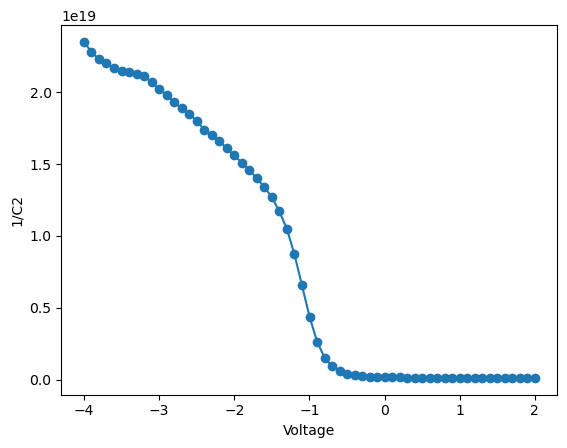

In [4]:
cnt =0

c = []
v = []

with open(file,"r") as f:
    data = csv.reader(f)
    for i in data:
        cnt += 1
        if (cnt >= 4):
            v.append(float(i[2]))
            c.append(float(i[3]))

plt.plot(v,c,'-o')
plt.xlabel("Voltage")
plt.ylabel("1/C2")

Enter the starting val of voltage :  -3
Enter the ending val of voltage :  -1


7 27


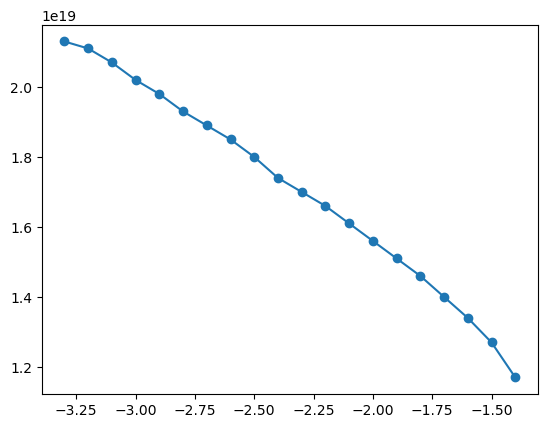

Press 1 to try again else 0 :  1
Enter the starting val of voltage :  -3
Enter the ending val of voltage :  -1.5


7 22


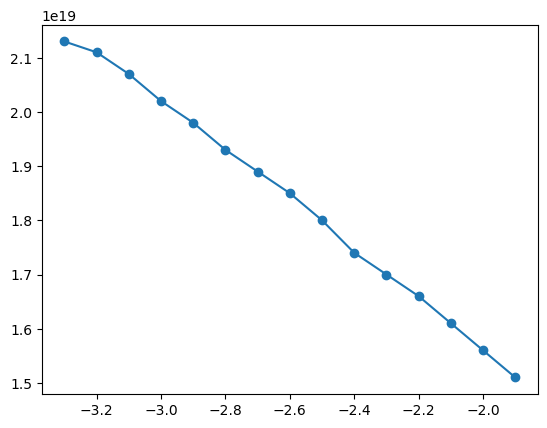

Press 1 to try again else 0 :  0


In [5]:
start_idx = 0
end_idx = 0
while True:
    start_val = float(input("Enter the starting val of voltage : "))
    end_val = float(input("Enter the ending val of voltage : "))
    start_idx = v.index(closest(v,start_val)) - 3
    end_idx = v.index(closest(v,end_val)) - 3
    # start_idx =  v.index(min(v, key = lambda x1 : abs(start_val - x1))) - 3
    # end_idx =  v.index(max(v, key = lambda x1 : abs(start_val - x1))) - 3
    print(start_idx,end_idx)
    plt.plot(v[start_idx:end_idx],c[start_idx:end_idx],'-o')
    plt.show()
    again = int(input("Press 1 to try again else 0 : "))
    if again == 1:
        pass
    else:
        break

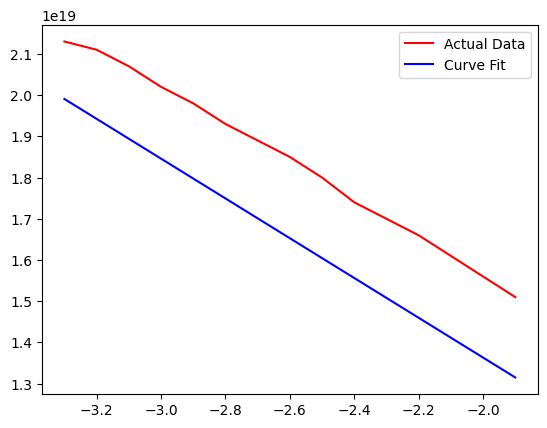

In [6]:
curve = np.polyfit(v,c,1)
poly = np.poly1d(curve)
temp = [] 

for i in v[start_idx:end_idx]:
    temp.append(poly(i))
    
plt.plot(v[start_idx:end_idx],c[start_idx:end_idx],color='r')
plt.plot(v[start_idx:end_idx],temp[:],color='b')
plt.legend(["Actual Data","Curve Fit"])

In [7]:
xs = sp.symbols('x')
f_lst = 0
# print(curve)

for i in range(len(curve)):
    f_lst += curve[i]*pow(xs,(len(curve)-1-i))
# print(f_lst)
# print(f)

df = sp.diff(f_lst, xs,int(input(f"Enter nth derivative(Max is {len(curve)-1}) : ")))
slope = df.subs(xs, float(input("Enter slope at point x : "))).evalf()
print(slope)

# f = -4.362e-10*x**7 + 4.02e-09*x**6 - 1.244e-08*x**5 + 1.282e-08*x**4 + 5.667e-09*x**3 - 1.64e-08*x**2 - 2.939e-09*x + 6.226e-08
# df = diff(f, x,int(input("Enter nth derivative : ")))
# slope = df.subs(x, int(input("Enter slope at point x : ")))
# print(slope)

Enter nth derivative(Max is 1) :  1
Enter slope at point x :  -2.4


-4.82507658827027e+18
